Implement a KNN model to classify the animals in to category

In [1]:
import pandas as pd
import numpy as np

In [2]:
zoo=pd.read_csv('/users/rahulkp/downloads/Zoo.csv')
zoo.head(20)

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
5,buffalo,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
6,calf,1,0,0,1,0,0,0,1,1,1,0,0,4,1,1,1,1
7,carp,0,0,1,0,0,1,0,1,1,0,0,1,0,1,1,0,4
8,catfish,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
9,cavy,1,0,0,1,0,0,0,1,1,1,0,0,4,0,1,0,1


In [3]:
zoo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


In [4]:
array=zoo.values
X=array[:,1:17]
Y=zoo.type

In [5]:
X.shape

(101, 16)

In [6]:
Y.shape

(101,)

In [7]:
from sklearn.model_selection import KFold
kfold=KFold(n_splits=10)

In [8]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
model=KNeighborsClassifier(n_neighbors=4)
result=cross_val_score(model,X,Y,cv=kfold)

In [9]:
print('Result:',result)
print('Mean of Result:',result.mean())

Result: [1.  0.8 1.  1.  0.9 1.  1.  0.7 0.9 0.9]
Mean of Result: 0.9199999999999999


by Selecting the value of K=4,we got an accuracy of 91.99%

the best value of k can be found by using GRID SEARCH , there by we could look for a room of improvement in accuracy

# Grid Search for Algorithm Tuning

To avoid the dilemma in choosing the neighbour points,For The best value of K ,we consider ODD numbers

In [16]:
from sklearn.model_selection import GridSearchCV
n_neighbors = np.array([2*i+1 for i in range(1,15)])
param_grid=dict(n_neighbors=n_neighbors)
param_grid

{'n_neighbors': array([ 3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29])}

In [17]:
KNN=KNeighborsClassifier()
grid=GridSearchCV(estimator=KNN,param_grid=param_grid,cv=10)
grid.fit(X,Y)

/Users/rahulkp/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(


GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29])})

In [18]:
print(grid.best_score_)
print(grid.best_params_)

0.95
{'n_neighbors': 3}


The best value for K is 3

By using K = 3 we can get an accuracy of 95%

# Visualizing the CV results

/Users/rahulkp/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(
/Users/rahulkp/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(
/Users/rahulkp/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(
/Users/rahulkp/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(
/Users/rahulkp/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 4 members, whic

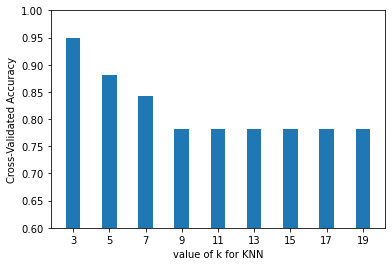

In [24]:
import matplotlib.pyplot as plt 
%matplotlib inline
k_range=[2*i+1 for i in range(1,10)]
k_scores=[]
for k in k_range:
    knn=KNeighborsClassifier(n_neighbors=k)
    scores=cross_val_score(knn,X,Y,cv=10)
    k_scores.append(scores.mean())
    
plt.bar(k_range,k_scores)
plt.xlabel('value of k for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.xticks(k_range)
plt.ylim(0.6,1)
plt.show()

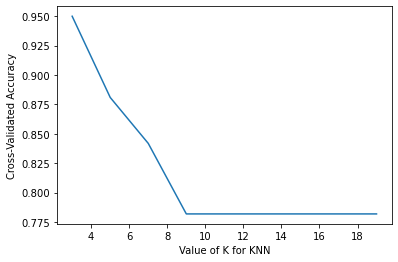

In [25]:
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()